We use the functions we defined in the regression_utils file. This notebook is just for running and plotting them.

In [15]:
import pandas as pd
from regression_utils import *

In [16]:
session = 757216464

In [17]:
drifting_dataset = pd.read_parquet(f'../ourdata/drifting_dataset_session_{session}.parquet')
static_dataset = pd.read_parquet(f'../ourdata/static_dataset_session_{session}.parquet')

We restrict our attention to those visual areas which have a high number of neurons with high variance:

In [18]:
high_variance_visual_areas = ['VISal', 'VISp', 'VISrl', 'VISam', 'VISl']

In [19]:
def area_summary_df(area, plot=False):
    temporal_frequency = summarise_area(drifting_dataset, area, 'temporal_frequency', plot=plot)
    orientation_drifting = summarise_area(drifting_dataset, area, 'orientation', plot=plot)
    spatial_frequency = summarise_area(static_dataset, area, 'spatial_frequency', plot=plot)
    orientation_static = summarise_area(static_dataset, area, 'orientation', plot=plot)
    return pd.DataFrame({
        'temporal_frequency': temporal_frequency,
        'orientation_drifting': orientation_drifting,
        'spatial_frequency': spatial_frequency,
        'orientation_static': orientation_static
    }).T

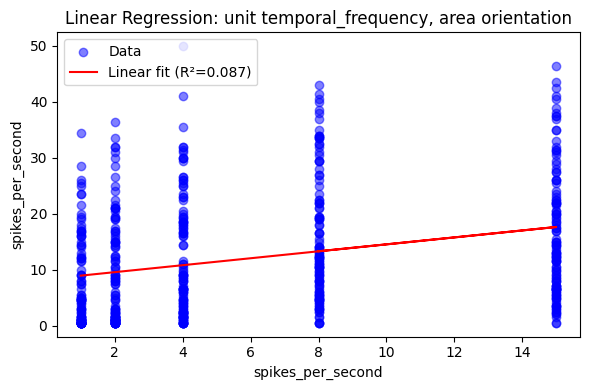

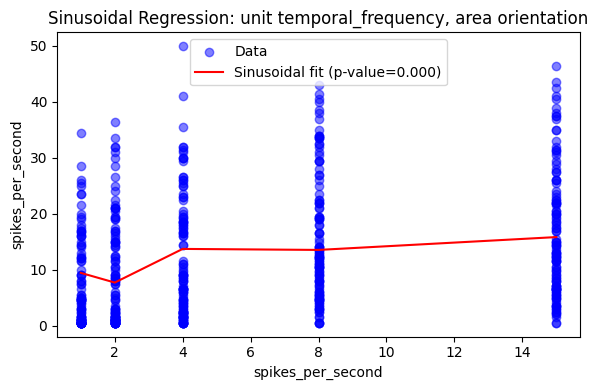

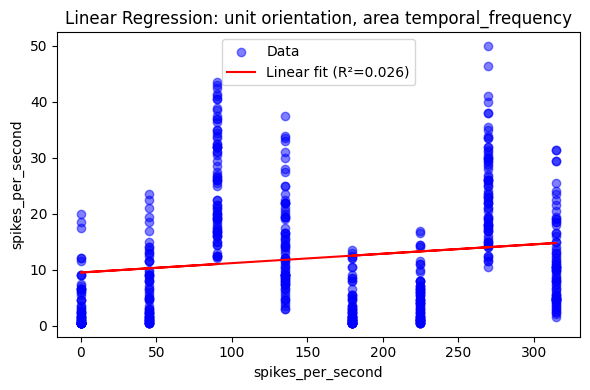

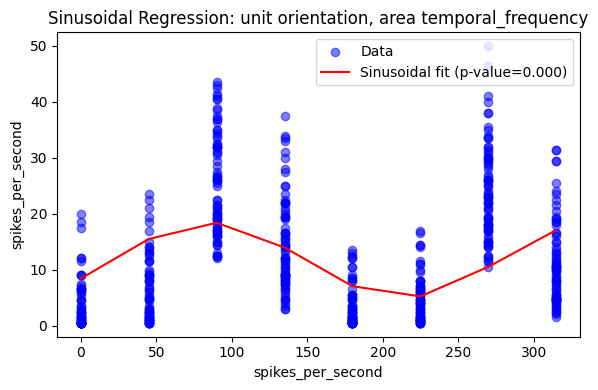

{'linear_r2': 0.025580072544362675,
 'linear_p_value': 0.00012917420470648366,
 'slope': 0.01677283733873754,
 'slope_direction': 'positive',
 'sin_r2': 0.1793671724149395,
 'sin_p_value': 1.1102230246251565e-16}

In [33]:
# plot some example units:
filtered_dataset = drifting_dataset[drifting_dataset['unit_id'] == 951819264][['unit_id', 'temporal_frequency', 'orientation', 'spikes_per_second']]
filtered_dataset

fit_and_test_models(filtered_dataset['temporal_frequency'].values, filtered_dataset['spikes_per_second'].values, 'temporal_frequency', 'orientation', 'spikes_per_second', plot=True)
fit_and_test_models(filtered_dataset['orientation'].values, filtered_dataset['spikes_per_second'].values, 'orientation', 'temporal_frequency', 'spikes_per_second', plot=True)

In [23]:
area_summary_df('VISal')

,n_units,n_linear_significant,n_positive,n_negative,n_sin_significant
temporal_frequency,53,43,18,25,45
orientation_drifting,53,21,8,13,34
spatial_frequency,53,35,5,30,37
orientation_static,53,30,18,12,37


In [24]:
area_summary_df('VISp')

,n_units,n_linear_significant,n_positive,n_negative,n_sin_significant
temporal_frequency,85,60,17,43,64
orientation_drifting,85,26,8,18,59
spatial_frequency,85,56,16,40,63
orientation_static,85,47,23,24,62


In [25]:
area_summary_df('VISrl')

,n_units,n_linear_significant,n_positive,n_negative,n_sin_significant
temporal_frequency,37,19,9,10,23
orientation_drifting,37,17,9,8,19
spatial_frequency,37,20,8,12,24
orientation_static,37,18,10,8,19


In [26]:
area_summary_df('VISam')

,n_units,n_linear_significant,n_positive,n_negative,n_sin_significant
temporal_frequency,64,40,18,22,43
orientation_drifting,64,22,8,14,32
spatial_frequency,64,41,12,29,43
orientation_static,64,31,22,9,39


In [27]:
area_summary_df('VISl')

,n_units,n_linear_significant,n_positive,n_negative,n_sin_significant
temporal_frequency,53,34,9,25,35
orientation_drifting,53,21,1,20,33
spatial_frequency,53,35,14,21,43
orientation_static,53,31,11,20,37
